In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [3]:
class Bandit:
    def __init__(self, true_win_prob):
        """
        Initialize the bandit with a true probability of success.
        
        Parameters:
        - true_win_prob: The actual (unknown to agent) win rate of the bandit.
        """
        self.p = true_win_prob  # True win probability
        self.p_estimate = 0     # Estimated win probability
        self.N = 0              # Number of times this bandit has been pulled

    def pull(self):
        """
        Simulate pulling the bandit.
        
        Returns:
        - 1 (win) with probability p, 0 (loss) otherwise.
        """
        return 1 if np.random.random() < self.p else 0

    def update(self, reward):
        """
        Update the estimated win probability based on the new reward. 
        estimate <- p_estimate + (1 / N) * (reward - p_estimate) 
        
        Parameters:
        - reward: 1 for win, 0 for loss
        """
        self.N += 1
        self.p_estimate += (1 / self.N) * (reward - self.p_estimate)

In [4]:
def experiment():
    # Initialize bandits with true probabilities
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

    # Tracking variables
    rewards = np.zeros(NUM_TRIALS)
    num_explorations = 0
    num_exploitations = 0
    num_optimal_choices = 0
    optimal_bandit_index = np.argmax([b.p for b in bandits])

    print("Optimal bandit index (highest true win rate):", optimal_bandit_index)

    # Run the experiment for the specified number of trials
    for trial in range(NUM_TRIALS):
        # ε-greedy action selection
        if np.random.random() < EPS:
            num_explorations += 1
            chosen_bandit = np.random.randint(len(bandits))
        else:
            num_exploitations += 1
            chosen_bandit = np.argmax([b.p_estimate for b in bandits])

        # Check if optimal bandit was chosen
        if chosen_bandit == optimal_bandit_index:
            num_optimal_choices += 1

        # Simulate pulling the bandit's arm
        reward = bandits[chosen_bandit].pull()

        # Log the reward
        rewards[trial] = reward

        # Update the bandit's estimated win rate
        bandits[chosen_bandit].update(reward)

    # Print estimated probabilities for each bandit
    print("\nFinal estimated win probabilities:")
    for i, b in enumerate(bandits):
        print(f"Bandit {i}: estimate = {b.p_estimate:.4f}, true p = {b.p}")

    # Summarize performance
    total_reward = rewards.sum()
    print("\n--- Summary ---")
    print("Total reward earned:", int(total_reward))
    print("Overall win rate:", total_reward / NUM_TRIALS)
    print("Explorations:", num_explorations)
    print("Exploitations:", num_exploitations)
    print("Optimal bandit selected:", num_optimal_choices, "times")

    # Plot the win rate over time
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)

    plt.plot(win_rates, label="Epsilon-Greedy Win Rate")
    plt.plot(np.ones(NUM_TRIALS) * np.max(BANDIT_PROBABILITIES), label="Optimal Win Rate")
    plt.xlabel("Trial")
    plt.ylabel("Win Rate")
    plt.title("Epsilon-Greedy Bandit Performance")
    plt.legend()
    plt.show()

Optimal bandit index (highest true win rate): 2

Final estimated win probabilities:
Bandit 0: estimate = 0.2345, true p = 0.2
Bandit 1: estimate = 0.4484, true p = 0.5
Bandit 2: estimate = 0.7535, true p = 0.75

--- Summary ---
Total reward earned: 7272
Overall win rate: 0.7272
Explorations: 979
Exploitations: 9021
Optimal bandit selected: 9354 times


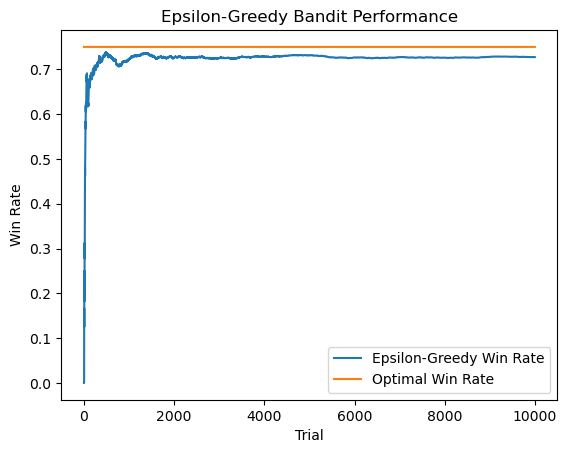

In [5]:
if __name__ == "__main__":
  experiment()

In [ ]:
# This is just for test.
print("Test complete.")
print("Test complete.")